In [1]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

# JAS comaprison

In [2]:
path = '/home/links/ct715/eddy_feedback/chapter1/annular_modes/data'
efp_data = path + '/efp/EFP_NH_SH_PAMIP_11.csv'
sam_data = path + '/pamip_misc/pc1_variance_JAS.csv'

efp = pd.read_csv(efp_data)
sam = pd.read_csv(sam_data)

# Merge the DataFrames on the 'model' column
merged_df = pd.merge(sam, efp, left_on='model', right_on='Model')

# Select only the columns you want: model, variance, and SH Feedback (JAS)
result_df = merged_df[['model', 'variance', 'SH Feedback (JAS)']]
df = result_df.rename(columns={'SH Feedback (JAS)': 'SH_Feedback_JAS'})
df

,model,variance,SH_Feedback_JAS
0,CESM2,297.06,0.3419
1,CNRM-CM6-1,232.99,0.2082
2,CanESM5,138.52,0.4618
3,EC-EARTH3,471.31,0.3135
4,FGOALS-f3-L,92.52,0.1274
5,HadGEM3-GC31-LL,201.83,0.2951
6,HadGEM3-GC31-MM,549.04,0.3002
7,IPSL-CM6A-LR,248.92,0.1959
8,MIROC6,193.18,0.3253
9,NorESM2-LM,145.07,0.3754


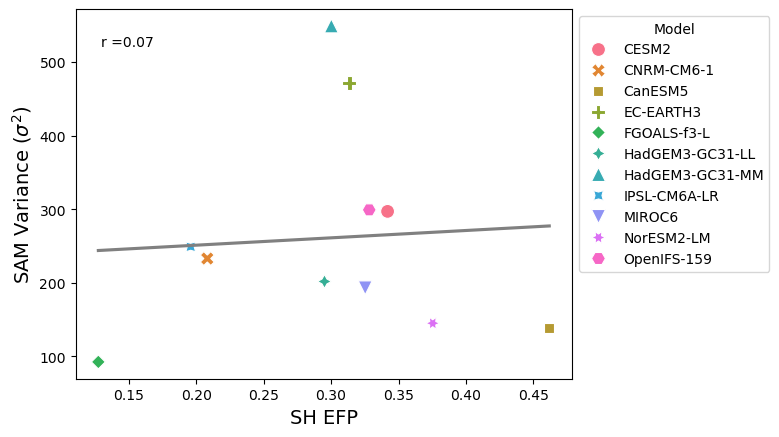

In [3]:
sns.regplot(data=df, x='SH_Feedback_JAS', y='variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=df, x='SH_Feedback_JAS', y='variance', hue='model', style='model', s=100)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=df['variance'], y=df['SH_Feedback_JAS'])
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes)

plt.ylabel('SAM Variance ($\sigma^2$)', fontsize=14)
plt.xlabel('SH EFP', fontsize=14)
plt.legend(bbox_to_anchor=(1,1), title='Model')
plt.savefig('./plots/sam_var_JAS_vs_EFP.png')
plt.show()

# Full year variance comparison

In [4]:
path = '/home/links/ct715/eddy_feedback/chapter1/annular_modes/data'
efp_data = path + '/efp/EFP_NH_SH_PAMIP_11.csv'
sam_data = path + '/pamip_misc/pc1_variance_FY.csv'

efp = pd.read_csv(efp_data)
sam = pd.read_csv(sam_data)

# Merge the DataFrames on the 'model' column
merged_df = pd.merge(sam, efp, left_on='model', right_on='Model')

# Select only the columns you want: model, variance, and SH Feedback (JAS)
result_df = merged_df[['model', 'variance', 'SH Feedback (JAS)']]
df = result_df.rename(columns={'SH Feedback (JAS)': 'SH_Feedback_JAS'})
df

,model,variance,SH_Feedback_JAS
0,CESM2,95.05,0.3419
1,CNRM-CM6-1,109.56,0.2082
2,CanESM5,51.15,0.4618
3,EC-EARTH3,170.49,0.3135
4,FGOALS-f3-L,31.84,0.1274
5,HadGEM3-GC31-LL,95.93,0.2951
6,HadGEM3-GC31-MM,178.00,0.3002
7,IPSL-CM6A-LR,91.91,0.1959
8,MIROC6,64.72,0.3253
9,NorESM2-LM,40.90,0.3754


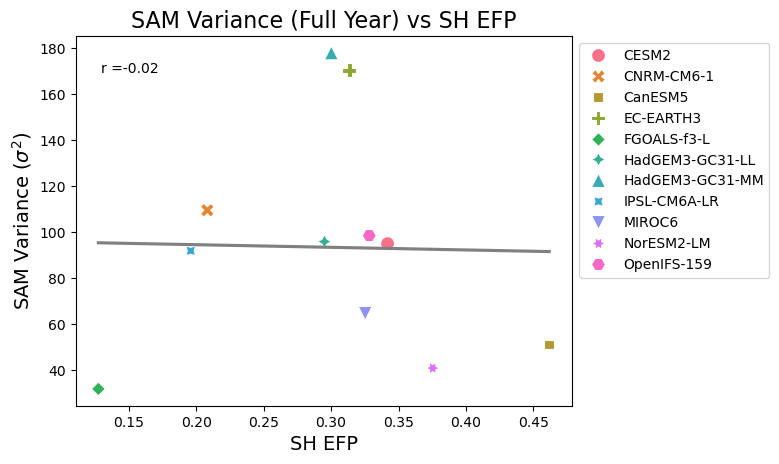

In [5]:
sns.regplot(data=df, x='SH_Feedback_JAS', y='variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=df, x='SH_Feedback_JAS', y='variance', hue='model', style='model', s=100)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=df['variance'], y=df['SH_Feedback_JAS'])
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes)

plt.ylabel('SAM Variance ($\sigma^2$)', fontsize=14)
plt.xlabel('SH EFP', fontsize=14)
plt.title('SAM Variance (Full Year) vs SH EFP', fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=10)
plt.savefig('./plots/sam_var_fullyear_vs_EFP.png')
plt.show()